In [62]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd
import re

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [63]:
test_df = pd.read_csv("titanic/test.csv")
train_df = pd.read_csv("titanic/train.csv")

# Data Preprocessing - 1. Missing Data
First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [64]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Visualisering - Der laves to plots med fokus på variablerne 'survived' og 'sex'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


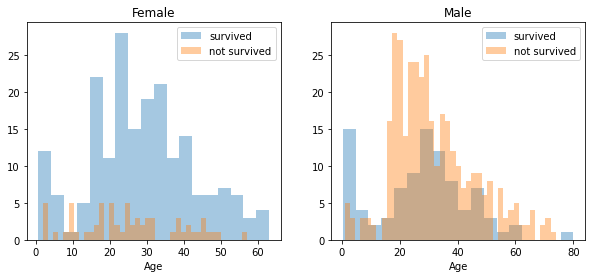

In [65]:
# creating label strings 
survived = 'survived'
not_survived = 'not survived'

# initializing plot objects from 'plt' import 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# creating two gender dataframes  
women = train_df[train_df['Sex'] == 'female'] 
men = train_df[train_df['Sex'] == 'male']

# creating a graph for female gender from 'sns' import
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

# creating a graph for male gender from 'sns' import
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Data Preprocessing - Vi reducere kompleksiteten i vores dataset
Dette er da det vil kræve meget preprocessing at omdanne de resterende variabler til nummeriske (f.eks. name -> titel)

In [66]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df = train_df.drop(['Name'], axis=1)
train_df = train_df.drop(['Fare'], axis=1)
train_df = train_df.drop(['Cabin'], axis=1)
train_df = train_df.drop(['Embarked'], axis=1)
train_df = train_df.drop(['SibSp'], axis=1)
train_df = train_df.drop(['Parch'], axis=1)
train_df = train_df.drop(['Pclass'], axis=1)

In [67]:
# preprocessing of 'Age' feature 
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

# Data Preprocessing - 2. Converting Features:

In [68]:
train_df.head(10)

,Survived,Sex,Age,Ticket
0,0,male,22,A/5 21171
1,1,female,38,PC 17599
2,1,female,26,STON/O2. 3101282
3,1,female,35,113803
4,0,male,35,373450
5,0,male,25,330877
6,0,male,54,17463
7,0,male,2,349909
8,1,female,27,347742
9,1,female,14,237736



1. Fare feature: Converting “Fare” from float to int64, using the “astype()” function pandas provides:

2. Name feature: We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

3. Sex feature: Convert ‘Sex’ feature into numeric.

4. Ticket feature

5. Embarked feature


In [69]:
# converting 'sex' feature from string to numeric type
data = [train_df, test_df]
genders = {"male": 0, "female": 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

# converting 'Embarked' feature from string to numeric type
data = [train_df, test_df]
ports = {"S": 0, "C": 1, "Q": 2}


train_df.head(10)

,Survived,Sex,Age,Ticket
0,0,0,22,A/5 21171
1,1,1,38,PC 17599
2,1,1,26,STON/O2. 3101282
3,1,1,35,113803
4,0,0,35,373450
5,0,0,25,330877
6,0,0,54,17463
7,0,0,2,349909
8,1,1,27,347742
9,1,1,14,237736


# Data Preprocessing - 3. Creating Categories
We will now create categories within the following features:


In [70]:
train_df.head(10)

,Survived,Sex,Age,Ticket
0,0,0,22,A/5 21171
1,1,1,38,PC 17599
2,1,1,26,STON/O2. 3101282
3,1,1,35,113803
4,0,0,35,373450
5,0,0,25,330877
6,0,0,54,17463
7,0,0,2,349909
8,1,1,27,347742
9,1,1,14,237736


# Data Preprocessing - 4. Creating new Features: 
I will add two new features to the dataset, that I compute out of other features.

In [71]:
train_df.head(10)

,Survived,Sex,Age,Ticket
0,0,0,22,A/5 21171
1,1,1,38,PC 17599
2,1,1,26,STON/O2. 3101282
3,1,1,35,113803
4,0,0,35,373450
5,0,0,25,330877
6,0,0,54,17463
7,0,0,2,349909
8,1,1,27,347742
9,1,1,14,237736


In [72]:
train_df.to_csv('preprocessed_train.csv')


# Modeling - 1. Machine Learning
Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.


In [73]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [74]:
# Stochastic Gradient Descent (SGD):
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

ValueError: could not convert string to float: 'A/5 21171'

In [ ]:
# Random Forest: 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
# Logistic Regression: 
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
# K Nearest Neighbor: 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
# Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
# Perceptron: 
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [ ]:
# Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [ ]:
# Decision Tree: 
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### Which is the best model? 

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

## K-Fold Cross Validation:
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get’s trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get’s trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

![figure](K-Fold_Cross_Validation_.png)

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

cross_val_result = pd.DataFrame({'Model': scores})
cross_val_result = cross_val_result.sort_values('Model',ascending=True)
cross_val_result

This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 4%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

## Feature Importance
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest. It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:



In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


In [ ]:
importances.plot.bar()